In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn as skl

In [2]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
energy_efficiency = fetch_ucirepo(id=242)

X = energy_efficiency.data.features
y = energy_efficiency.data.targets

df = pd.concat([X, y], axis=1)
df.columns = ["Relative_Compactness", "Surface_Area", "Wall_Area", "Roof_Area",
                "Overall_Height", "Orientation", "Glazing_Area",
                "Glazing_Area_Distribution", "Heating_Load", "Cooling_Load"]
Y=df.iloc[:,-2]
print("\nMissing Values:\n", df.isnull().sum())

# Check summary statistics
print("\nSummary Statistics:\n", df.describe())

df.head()




Missing Values:
 Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64

Summary Statistics:
        Relative_Compactness  Surface_Area   Wall_Area   Roof_Area  \
count            768.000000    768.000000  768.000000  768.000000   
mean               0.764167    671.708333  318.500000  176.604167   
std                0.105777     88.086116   43.626481   45.165950   
min                0.620000    514.500000  245.000000  110.250000   
25%                0.682500    606.375000  294.000000  140.875000   
50%                0.750000    673.750000  318.500000  183.750000   
75%                0.830000    741.125000  343.000000  220.500000   
max                0.980000    808.500000  416.500000  220.500000   

       Overall_

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [3]:
Y

,Heating_Load
0,15.55
1,15.55
2,15.55
3,15.55
4,20.84
...,...
763,17.88
764,16.54
765,16.44
766,16.48


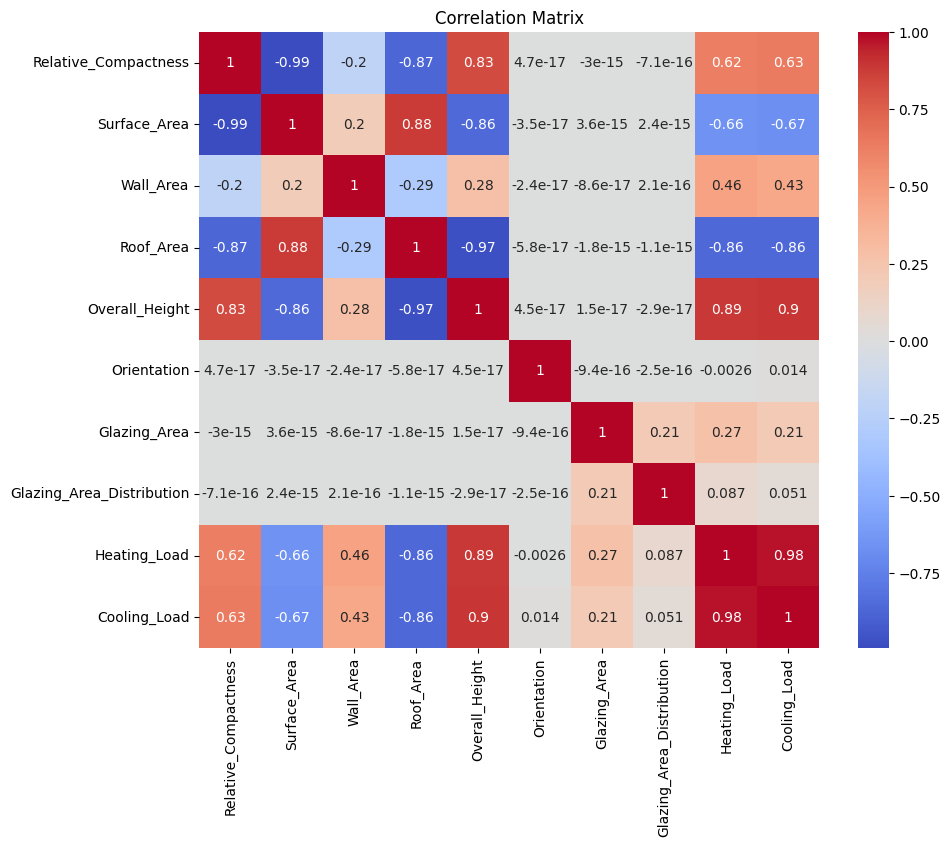

,0
Relative_Compactness,0.622272
Surface_Area,-0.658120
Wall_Area,0.455671
Roof_Area,-0.861828
Overall_Height,0.889431
Orientation,-0.002587
Glazing_Area,0.269841
Glazing_Area_Distribution,0.087368
Heating_Load,1.000000
Cooling_Load,0.975862


In [4]:

# Check correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()
correlation=df.corrwith(df['Heating_Load'])
correlation

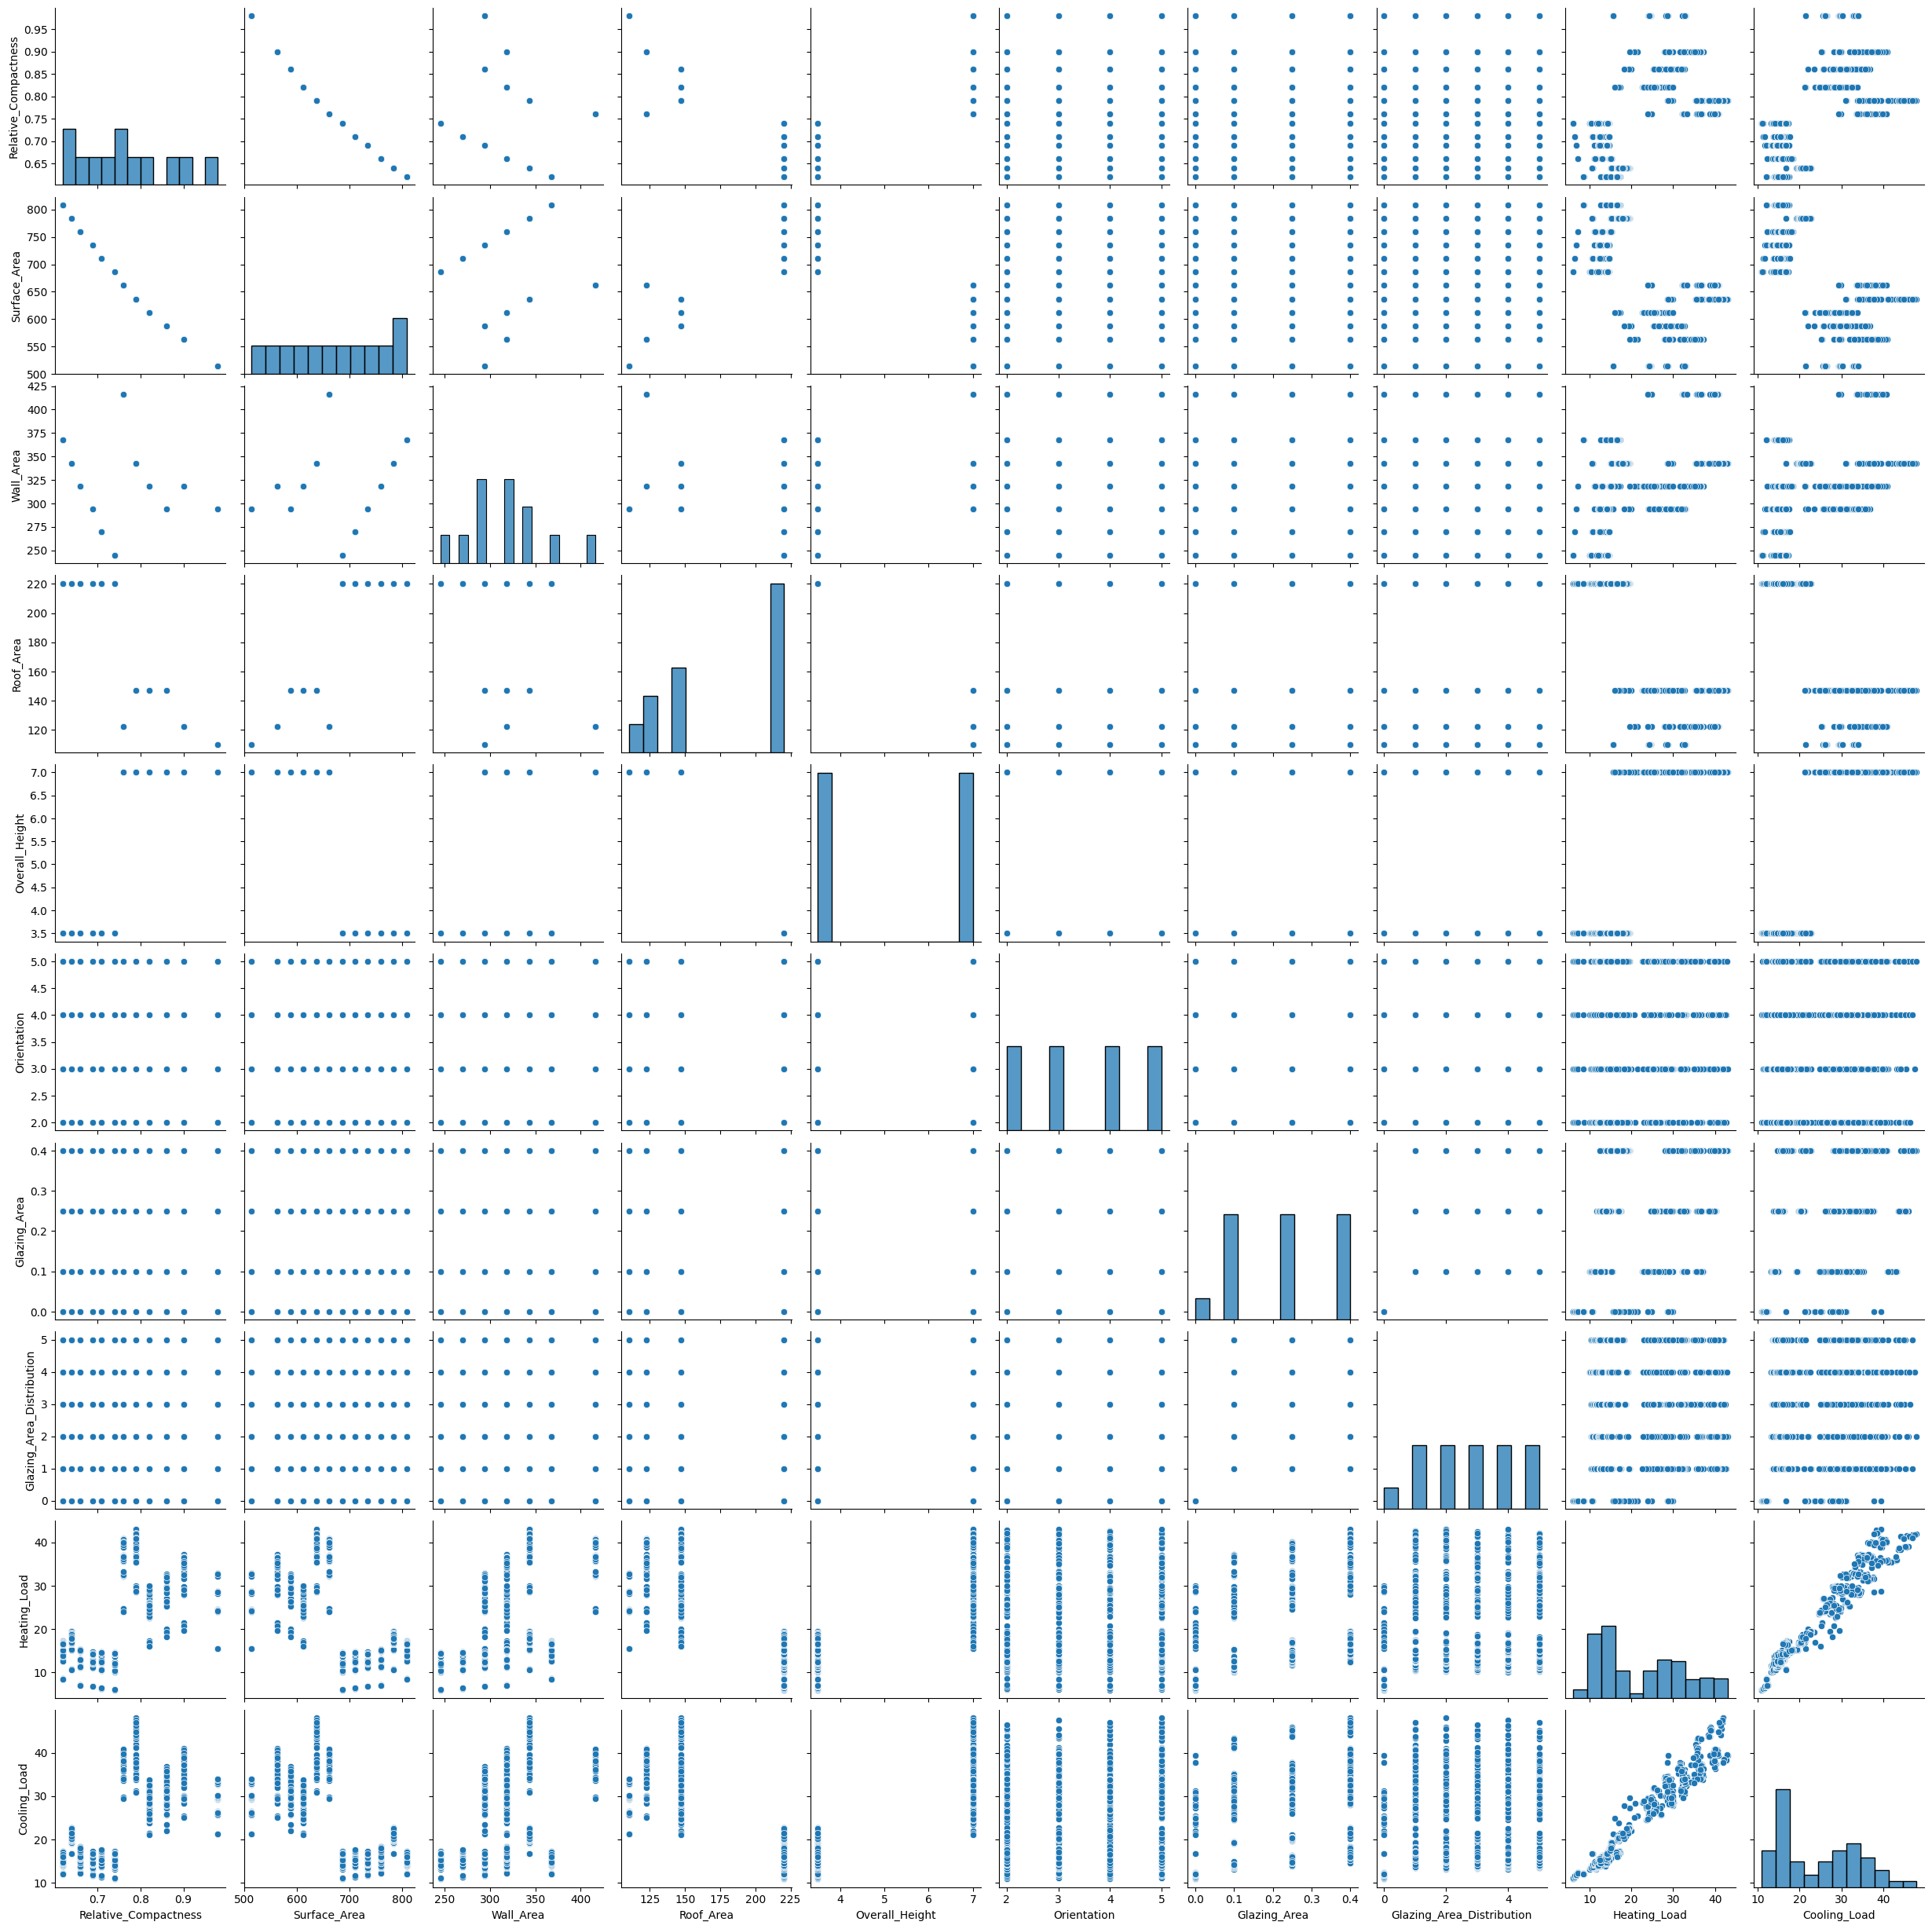

In [5]:
sns.pairplot(data=df)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Multivariate Linear Regression

In [7]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)


In [8]:
from sklearn.preprocessing import StandardScaler


sc = StandardScaler()
"""x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

x_train_manual = np.hstack([np.ones((x_train_scaled.shape[0], 1)), x_train_scaled])
x_test_manual = np.hstack([np.ones((x_test_scaled.shape[0], 1)), x_test_scaled])"""
X=sc.fit_transform(X)


In [9]:
def cost_function(X, Y, B):           #X=Feature Matrix, Y=Array of target values, B=Initial value of theta
 m = len(Y)
 J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
 return J

In [10]:
def batch_gradient_descent(X, Y, B, alpha, iterations):
 cost_history = []
 m = len(Y)

 for iteration in range(iterations):
  #print(iteration)
 # Hypothesis Values
  h = X.dot(B)
 # Difference b/w Hypothesis and Actual Y
  loss = h - Y.values
 # Gradient Calculation
  gradient = X.T.dot(loss) / m
 # Changing Values of B using Gradient
  B = B -alpha * gradient
 # New Cost Value
 cost = cost_function(X, Y, B)
 cost_history.append(cost)

 return B, cost_history


In [24]:
s = 615         #no. of samples in training set
f = 8          #number of features
X_train = X[:s,:f]
X_train = np.c_[np.ones(len(X_train),dtype='int64'),X_train]
y_train = Y[:s]
X_test = X[:s,:f]
X_test = np.c_[np.ones(len(X_test),dtype='int64'),X_test]
y_test = Y[:s]

In [25]:
B = np.zeros(X_train.shape[1])
alpha = 0.005
iter_ = 3000
newB, cost_history = batch_gradient_descent(X_train, y_train, B, alpha, iter_)

In [26]:
y_pred = X_test.dot(newB)

In [27]:
def r2(y_pred,y):
 sst = np.sum((y-y.mean())**2)
 ssr = np.sum((y_pred-y)**2)
 r2 = 1-(ssr/sst)
 return(r2)

r2_result=r2(y_pred,y_test)
print(r2_result)

0.9042403782391697


Linear Regression

In [15]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [16]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [17]:
y_pred_lr=model.predict(x_test)
mse=mean_squared_error(y_test,y_pred_lr)
print("Mean Squared Error:",mse)
r2_lr=skl.metrics.r2_score(y_test,y_pred_lr)
print("R-squared:",r2_lr)
mae=np.mean(np.abs(y_pred_lr-y_test))
print("Mean Absolute Error:",mae)

Mean Squared Error: 10.399450045431681
R-squared: 0.8973910776048324
Mean Absolute Error: 2.2351694363606263


Lasso and Ridge Regression Model

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso

In [19]:
ridge_model = Ridge(alpha=0.05)  # You can tune 'alpha' for regularization strength
ridge_model.fit(x_train, y_train)

# Train Lasso Regression Model
lasso_model = Lasso(alpha=0.01)  # You can tune 'alpha' for regularization strength
lasso_model.fit(x_train, y_train)

Lasso(alpha=0.01)

In [20]:
ridge_preds = ridge_model.predict(x_test)
lasso_preds = lasso_model.predict(x_test)
print("Ridge Regression Results:")
print(f"Mean Squared Error: {mean_squared_error(y_test, ridge_preds)}")
print(f"R2 Score: {skl.metrics.r2_score(y_test, ridge_preds)}")


print("\nLasso Regression Results:")
print(f"Mean Squared Error: {mean_squared_error(y_test, lasso_preds)}")
print(f"R2 Score: {skl.metrics.r2_score(y_test, lasso_preds)}")



Ridge Regression Results:
Mean Squared Error: 10.405508200961773
R2 Score: 0.8973320339888079

Lasso Regression Results:
Mean Squared Error: 10.56656565347136
R2 Score: 0.8957466679245446


In [21]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance
perm_importance = permutation_importance(model, x_test, y_test, n_repeats=10, random_state=42)

# Display results
importance_df = pd.DataFrame({'Feature': df.columns[:-2], 'Importance': perm_importance.importances_mean})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)
print(importance_df)

correlation=correlation.sort_values(ascending=False)
print(correlation)

#Overall Height, Realtive compactness,glazing area,wall area,glazing area distribution

                     Feature  Importance
4             Overall_Height    1.148540
0       Relative_Compactness    0.871896
3                  Roof_Area    0.297977
1               Surface_Area    0.258675
6               Glazing_Area    0.114740
2                  Wall_Area    0.008852
7  Glazing_Area_Distribution    0.001572
5                Orientation   -0.000117
Heating_Load                 1.000000
Cooling_Load                 0.975862
Overall_Height               0.889431
Relative_Compactness         0.622272
Wall_Area                    0.455671
Glazing_Area                 0.269841
Glazing_Area_Distribution    0.087368
Orientation                 -0.002587
Surface_Area                -0.658120
Roof_Area                   -0.861828
dtype: float64


Design elements which most significantly impact heating load are overall height,relative compactness,glazing wall area and wall area.We can reduce heat loss by optimizing Glazing Area and ensuring appropriate insulation for walls and roofs.
We achieve the best accuracy using Lasso Regression and Multivariate Regression Models.